In [50]:
import numpy as np
import pandas as pd
from scipy.stats import t, ttest_1samp, ttest_rel, ttest_ind, levene

## 예시 12.9

In [33]:
score = np.array([58, 48, 48, 41, 34, 43, 38, 53, 41, 60, 
                  55, 44, 43, 49, 47, 33, 47, 40, 46, 53, 
                  40, 45, 39, 47, 50, 53, 46, 53])

# H0
mu = 20

# sample
mean = np.mean(score)
sd = np.std(score)
sample_size = len(score)
standard_error = sd / sample_size ** 0.5

print("mean:", mean)
print("std:", sd)
print("N:", sample_size)

mean: 46.214285714285715
std: 6.608204547903975
N: 28


In [17]:
t_stat, p_value = ttest_1samp(score, mu)
t_obs = (mean - mu) / standard_error
print("t-statistic:", t_stat)
print("t_obs:", t_obs)
print("p-value:", format(p_value, '.20f'))

t-statistic: 20.61277359627351
t_obs: 20.991021175091213
p-value: 0.00000000000000000473


In [12]:
confidence_level = 0.95
degrees_of_freedom = sample_size - 1
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, degrees_of_freedom)

In [22]:
lower_bound, upper_bound = t.interval(confidence_level, degrees_of_freedom, 
                                 mean, standard_error)
CI_lower = mean - t_critical * standard_error
CI_upper = mean + t_critical * standard_error
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)
print("confidence interval:", CI_lower, "<= mu <=", CI_upper)

lower bound: 43.65189149117232
upper bound: 48.77667993739911
confidence interval: 43.65189149117232 <= mu <= 48.77667993739911


In [23]:
effect_size = (mean - mu) / sd
print("cohen's d:", effect_size)

cohen's d: 3.96693012818444


## 예시 13.2

In [14]:
sample_before = np.array([83.8, 83.3, 86.0, 82.5, 86.7, 
                          79.6, 76.9, 94.2, 73.4, 80.5, 
                          81.6, 82.1, 77.6, 83.5, 89.9, 
                          86.0, 87.3])
sample_after = np.array([95.2, 94.3, 91.5, 91.9, 100.3, 
                         76.7, 76.8, 101.6, 94.9, 75.2, 
                         77.8, 95.5, 90.7, 92.5, 93.8, 
                         91.7, 98.0])

In [39]:
sample_data = pd.DataFrame()
sample_data['before'] = sample_before
sample_data['after'] = sample_after
sample_data['difference'] = sample_data['after'] - sample_data['before']
print(sample_data)

    before  after  difference
0     83.8   95.2        11.4
1     83.3   94.3        11.0
2     86.0   91.5         5.5
3     82.5   91.9         9.4
4     86.7  100.3        13.6
5     79.6   76.7        -2.9
6     76.9   76.8        -0.1
7     94.2  101.6         7.4
8     73.4   94.9        21.5
9     80.5   75.2        -5.3
10    81.6   77.8        -3.8
11    82.1   95.5        13.4
12    77.6   90.7        13.1
13    83.5   92.5         9.0
14    89.9   93.8         3.9
15    86.0   91.7         5.7
16    87.3   98.0        10.7


In [40]:
mean_difference = np.mean(sample_data['difference'])
std_difference = np.std(sample_data['difference'], ddof=1)
n = len(sample_data['difference'])
std_error = std_difference / np.sqrt(n)

print("mean difference:", mean_difference)
print("std difference:", std_difference)
print("N:", n)

mean difference: 7.264705882352942
std difference: 7.1574210767977196
N: 17


In [41]:
t_d_stat, p_value_2 = ttest_rel(sample_data['after'], sample_data['before'])
t_d_obs = mean_difference / std_error
print("t-statistic:", t_d_stat)
print("t-obs:", t_d_obs)
print("p-value:", p_value_2)

t-statistic: 4.184908135290033
t-obs: 4.1849081352900335
p-value: 0.0007002531056005393


In [42]:
dof = n - 1
t_d_critical = t.ppf(1 - alpha / 2, dof)

lower_interval = mean_difference - t_d_critical * std_error
upper_interval = mean_difference + t_d_critical * std_error

print("Confidence interval:", lower_interval, upper_interval)

Confidence interval: 3.5846995358779723 10.944712228827912


In [43]:
effect_size2 = mean_difference / std_difference
print("Effect size (Cohen's d):", effect_size2)

Effect size (Cohen's d): 1.014989310312203


## 예시 14.10

In [44]:
sample1 = np.array([0.15, -1.07, -0.81, 0.42, -1.06, 
                    -0.42, -1.44, 0.83, 0.39, 0.66, 
                    0.76, -0.80, -0.84, -1.02, -0.03, 
                    0.03, -0.53, -0.71, 0.11, -0.29, 
                    0.00])
sample2 = np.array([0.47, 1.48, -0.99, -0.22, -1.34, 
                    1.17, 0.82, 0.17, 0.69, -0.13, 
                    1.62, 0.51, -1.00, 0.98, -2.02, 
                    0.66, 0.23, 0.64, 1.19, 0.66])

In [54]:
mean_sample1 = np.mean(sample1)
std_sample1 = np.std(sample1)
n1 = len(sample1)

print("mean1:", mean_sample1)
print("std1:", std_sample1)
print("variance1:", std_sample1**2)
print("N1:", n1)

mean1: -0.27
std1: 0.6534086448332752
variance1: 0.4269428571428572
N1: 21


In [53]:
mean_sample2 = np.mean(sample2)
std_sample2 = np.std(sample2)
n2 = len(sample2)

print("mean2:", mean_sample2)
print("std2:", std_sample2)
print("variance2:", std_sample2**2)
print("N2:", n2)

mean2: 0.27949999999999997
std2: 0.9463428290001462
variance2: 0.89556475
N2: 20


In [51]:
f_statistic, p_f = levene(sample1, sample2)
print("F statistic:", f_statistic)
print("p-value:", p_f)

F statistic: 0.6650078115606063
p-value: 0.419750139138206


In [59]:
pooled_std = np.sqrt(((n1 - 1) * std_sample1**2 + (n2 - 1) * std_sample2**2) / (n1 + n2 - 2))
standard_error3 = pooled_std * np.sqrt(1/n1 + 1/n2)
print("pooled std:", pooled_std)

pooled std: 0.8094725632077228


In [57]:
t_stat3, p_value3 = ttest_ind(sample1, sample2, equal_var=True)
t_obs_ind = (mean_sample1 - mean_sample2) / standard_error3
print("t-statistic:", t_stat3)
print("t-obs:", t_obs_ind)
print("p-value:", p_value3)

t-statistic: -2.1185638328060654
t-obs: -2.1726925766199727
p-value: 0.040551122872119996


In [60]:
dof3 = n1 + n2 - 2
mean_d = mean_sample1 - mean_sample2
confidence_interval = t.interval(confidence_level, dof3, 
                                       loc=mean_d, 
                                       scale=standard_error)

print("Confidence interval:", confidence_interval)

Confidence interval: (-3.0755037150942863, 1.9765037150942861)


In [61]:
effect_size3 = mean_d / pooled_std
print("Effect size (Cohen's d):", effect_size3)

Effect size (Cohen's d): -0.678837090935459


In [62]:
import matplotlib.pyplot as plt

In [70]:
sample1_error = std_sample1 / np.sqrt(n1)
sample2_error = std_sample2 / np.sqrt(n2)

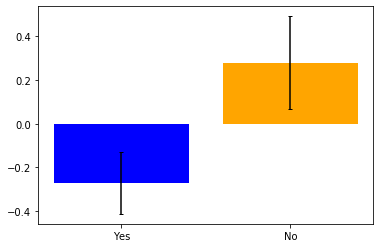

In [74]:
plt.bar([1, 2], [mean_sample1, mean_sample2], 
        tick_label=['Yes', 'No'], 
        color=['blue', 'orange'], 
        yerr=[sample1_error, sample2_error], capsize=2)
plt.show()